#                                        Baseball Case Study

In [1]:
# Importing Dictionaries..

import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell        ## To display multiple outputs
InteractiveShell.ast_node_interactivity = "all"
            
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt                                         
%matplotlib inline

import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Data Pre-Processing Packages
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale


import copy


from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# For Building Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor




## Evaluation Metrics
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Saving the model
import pickle

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
data.head(10)
#Getting the first 10 records of dataset...

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
data.info()
#Getting the information of data to check the type of column values..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [4]:
# Checking the number of unique values in each column
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [5]:
data.isnull().sum()
#Checking any null values presnt in data...

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
data.describe()
#To check the mean and std and any missing values...

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [7]:
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<Figure size 1296x1800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap to find corelation')

<function matplotlib.pyplot.show(close=None, block=None)>

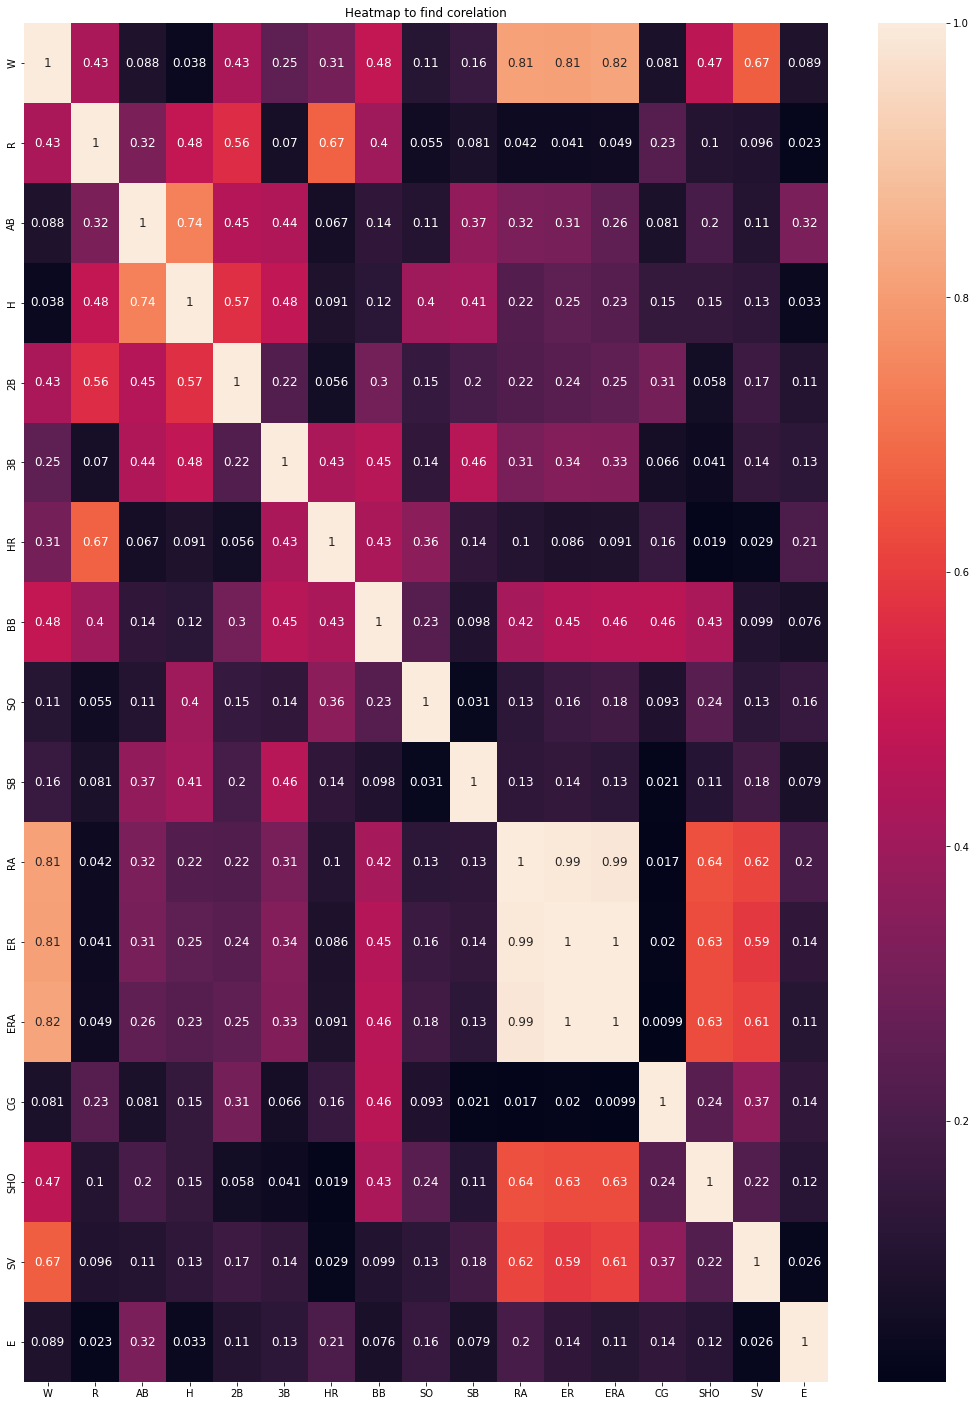

In [8]:
corr=data.corr().abs()
plt.figure(figsize=(18,25))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to find corelation")
plt.show
#finding the corelation between and features and label..

array([<AxesSubplot:title={'center':'W'}>,
       <AxesSubplot:title={'center':'R'}>,
       <AxesSubplot:title={'center':'AB'}>,
       <AxesSubplot:title={'center':'H'}>,
       <AxesSubplot:title={'center':'2B'}>,
       <AxesSubplot:title={'center':'3B'}>,
       <AxesSubplot:title={'center':'HR'}>,
       <AxesSubplot:title={'center':'BB'}>,
       <AxesSubplot:title={'center':'SO'}>,
       <AxesSubplot:title={'center':'SB'}>,
       <AxesSubplot:title={'center':'RA'}>,
       <AxesSubplot:title={'center':'ER'}>,
       <AxesSubplot:title={'center':'ERA'}>,
       <AxesSubplot:title={'center':'CG'}>,
       <AxesSubplot:title={'center':'SHO'}>,
       <AxesSubplot:title={'center':'SV'}>,
       <AxesSubplot:title={'center':'E'}>], dtype=object)

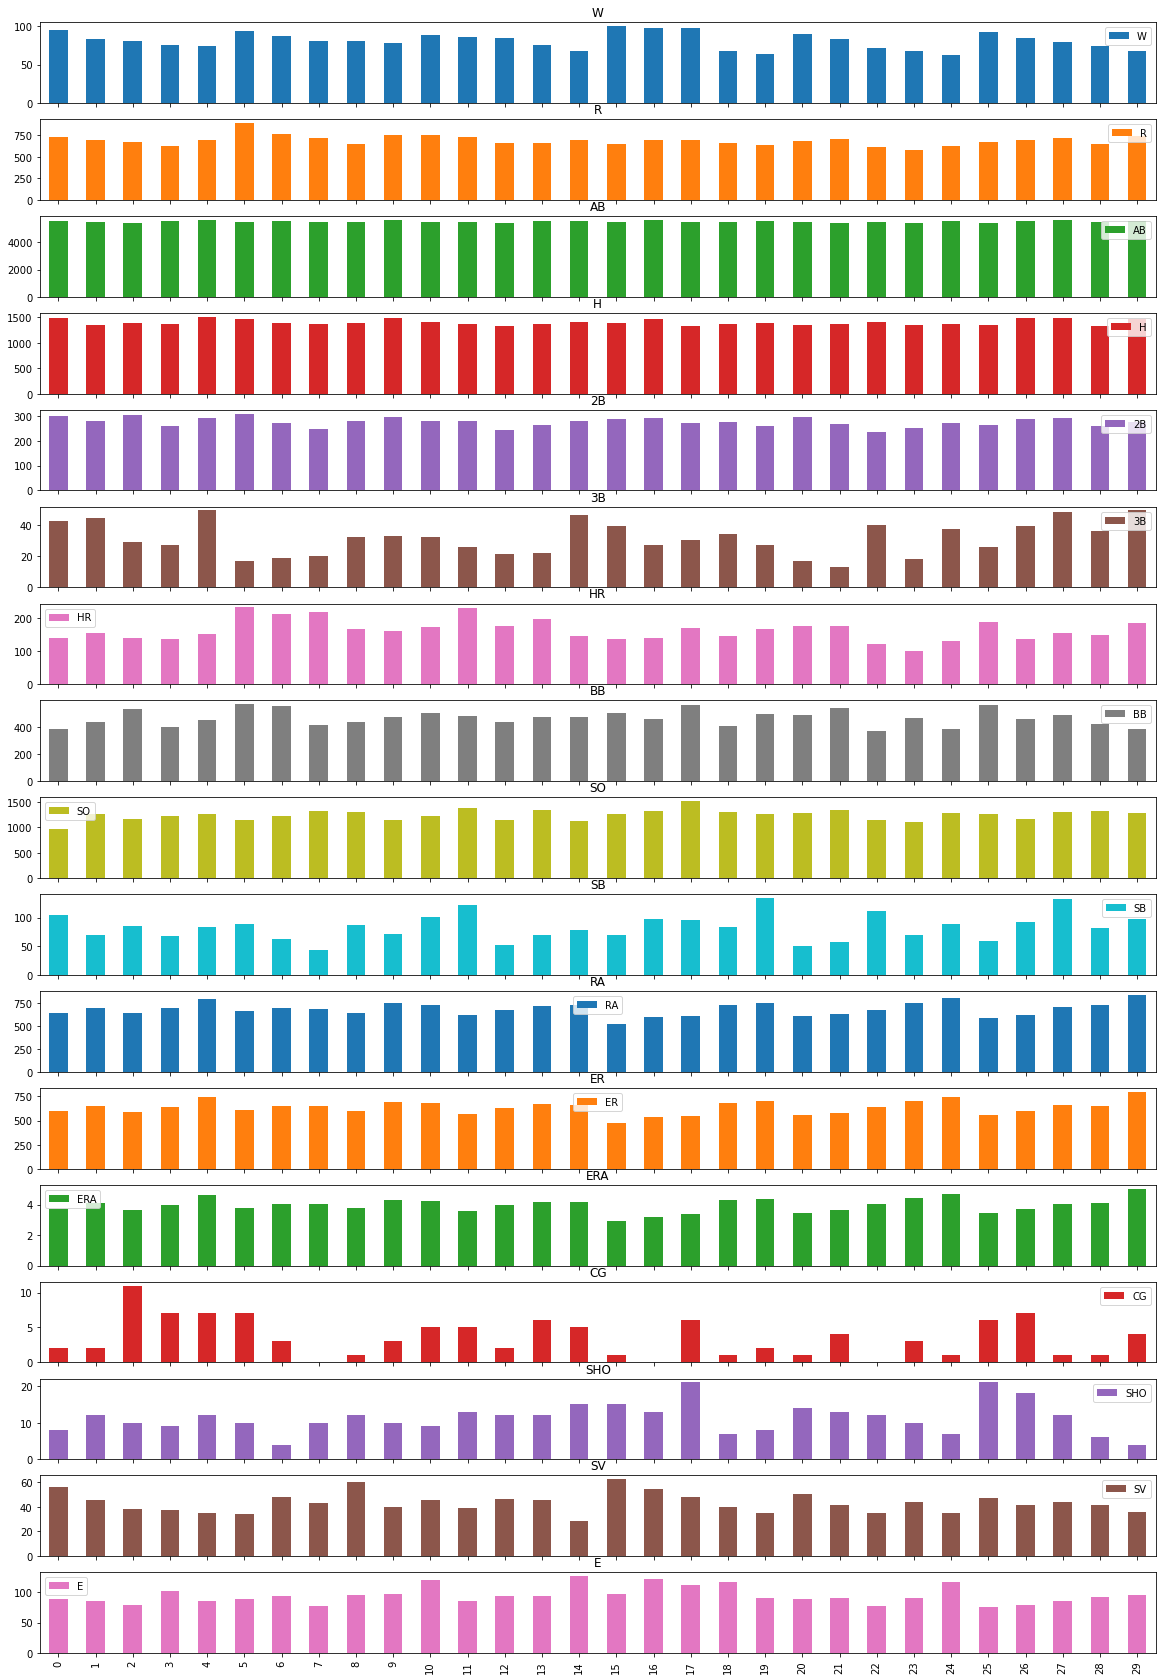

In [9]:
data.plot.bar(subplots= True,stacked= False, figsize=(20,30))

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>],
       [<AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>],
       [<AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>],
       [<AxesSubplot:title={'center':'SV'}>,
        <AxesSubplot:title={'center':'E'}>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

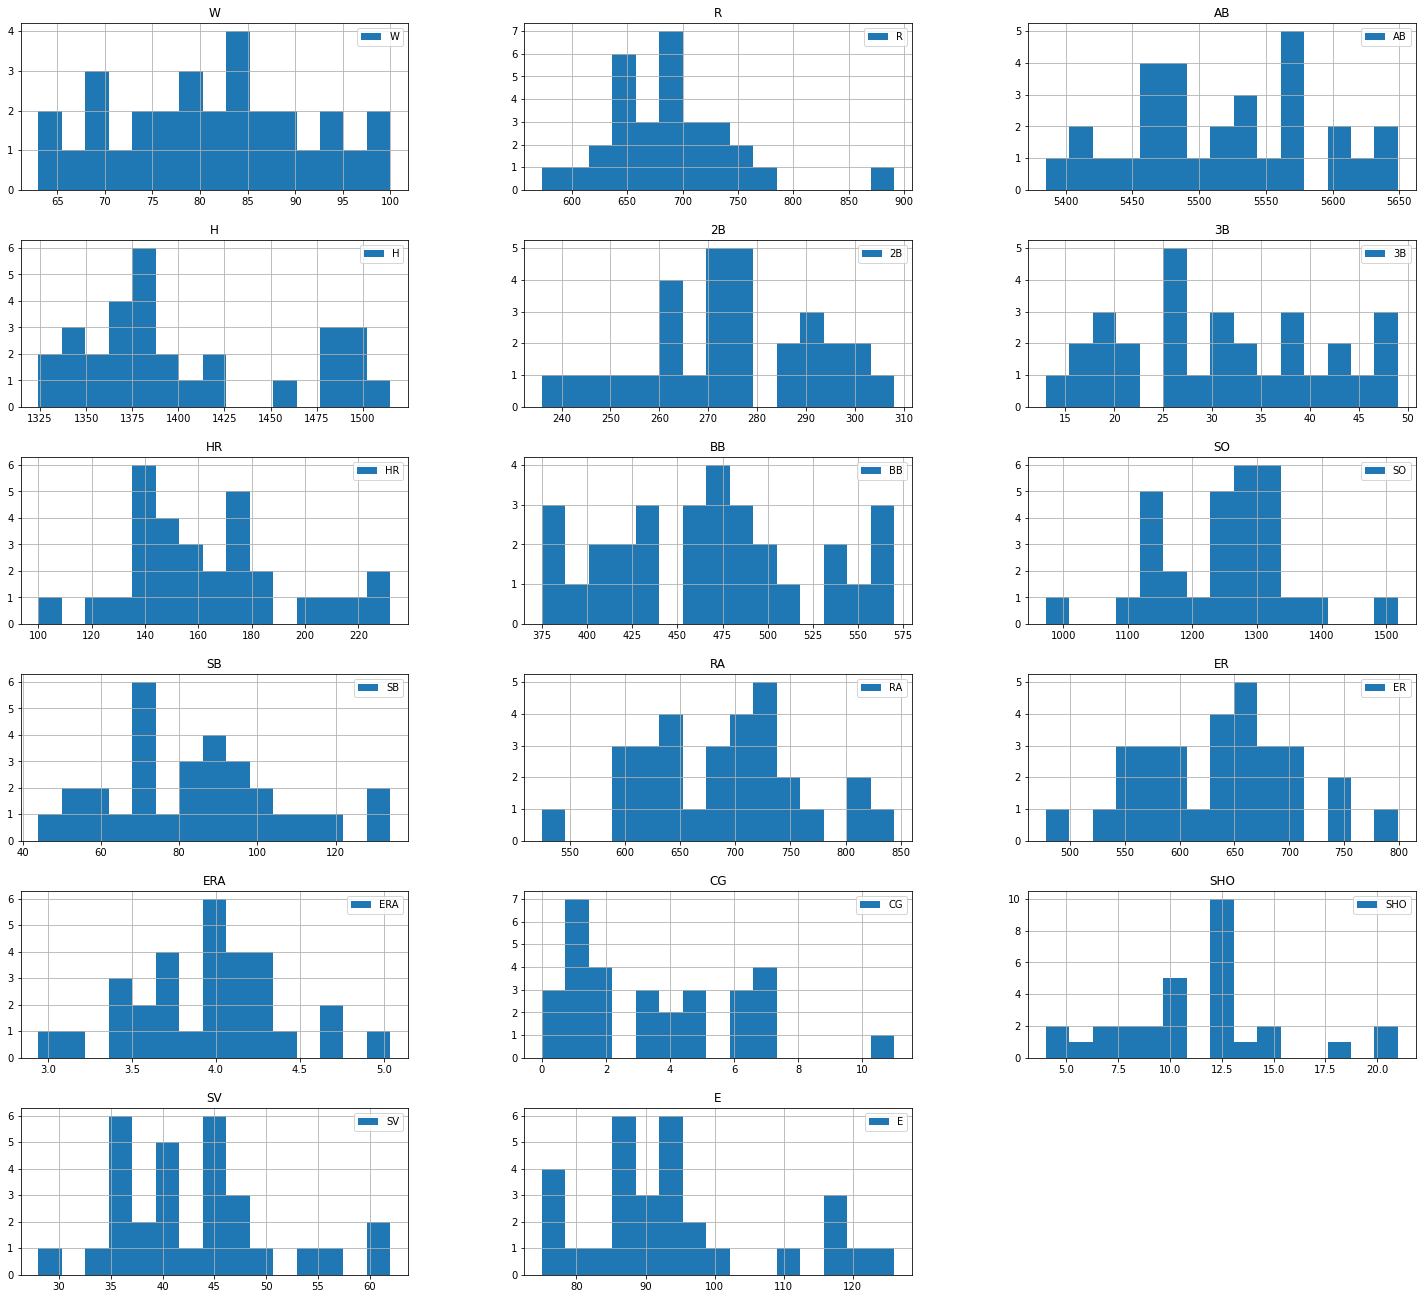

In [10]:
data.hist(figsize=(25,35),layout=(9,3),bins=15,legend=True)
plt.show()

<AxesSubplot:xlabel='W', ylabel='Count'>

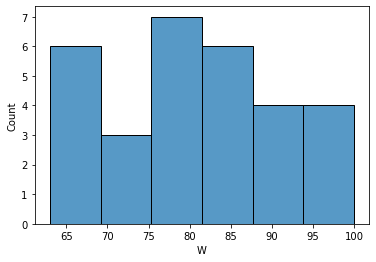

In [11]:
#Checking target variable using histplot...
sns.histplot(data["W"])

<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:xlabel='W', ylabel='Density'>

Text(0.5, 0, 'W')

<AxesSubplot:xlabel='R', ylabel='Density'>

Text(0.5, 0, 'R')

<AxesSubplot:xlabel='AB', ylabel='Density'>

Text(0.5, 0, 'AB')

<AxesSubplot:xlabel='H', ylabel='Density'>

Text(0.5, 0, 'H')

<AxesSubplot:xlabel='2B', ylabel='Density'>

Text(0.5, 0, '2B')

<AxesSubplot:xlabel='3B', ylabel='Density'>

Text(0.5, 0, '3B')

<AxesSubplot:xlabel='HR', ylabel='Density'>

Text(0.5, 0, 'HR')

<AxesSubplot:xlabel='BB', ylabel='Density'>

Text(0.5, 0, 'BB')

<AxesSubplot:xlabel='SO', ylabel='Density'>

Text(0.5, 0, 'SO')

<AxesSubplot:xlabel='SB', ylabel='Density'>

Text(0.5, 0, 'SB')

<AxesSubplot:xlabel='RA', ylabel='Density'>

Text(0.5, 0, 'RA')

<AxesSubplot:xlabel='ER', ylabel='Density'>

Text(0.5, 0, 'ER')

<AxesSubplot:xlabel='ERA', ylabel='Density'>

Text(0.5, 0, 'ERA')

<AxesSubplot:xlabel='CG', ylabel='Density'>

Text(0.5, 0, 'CG')

<AxesSubplot:xlabel='SHO', ylabel='Density'>

Text(0.5, 0, 'SHO')

<AxesSubplot:xlabel='SV', ylabel='Density'>

Text(0.5, 0, 'SV')

<AxesSubplot:xlabel='E', ylabel='Density'>

Text(0.5, 0, 'E')

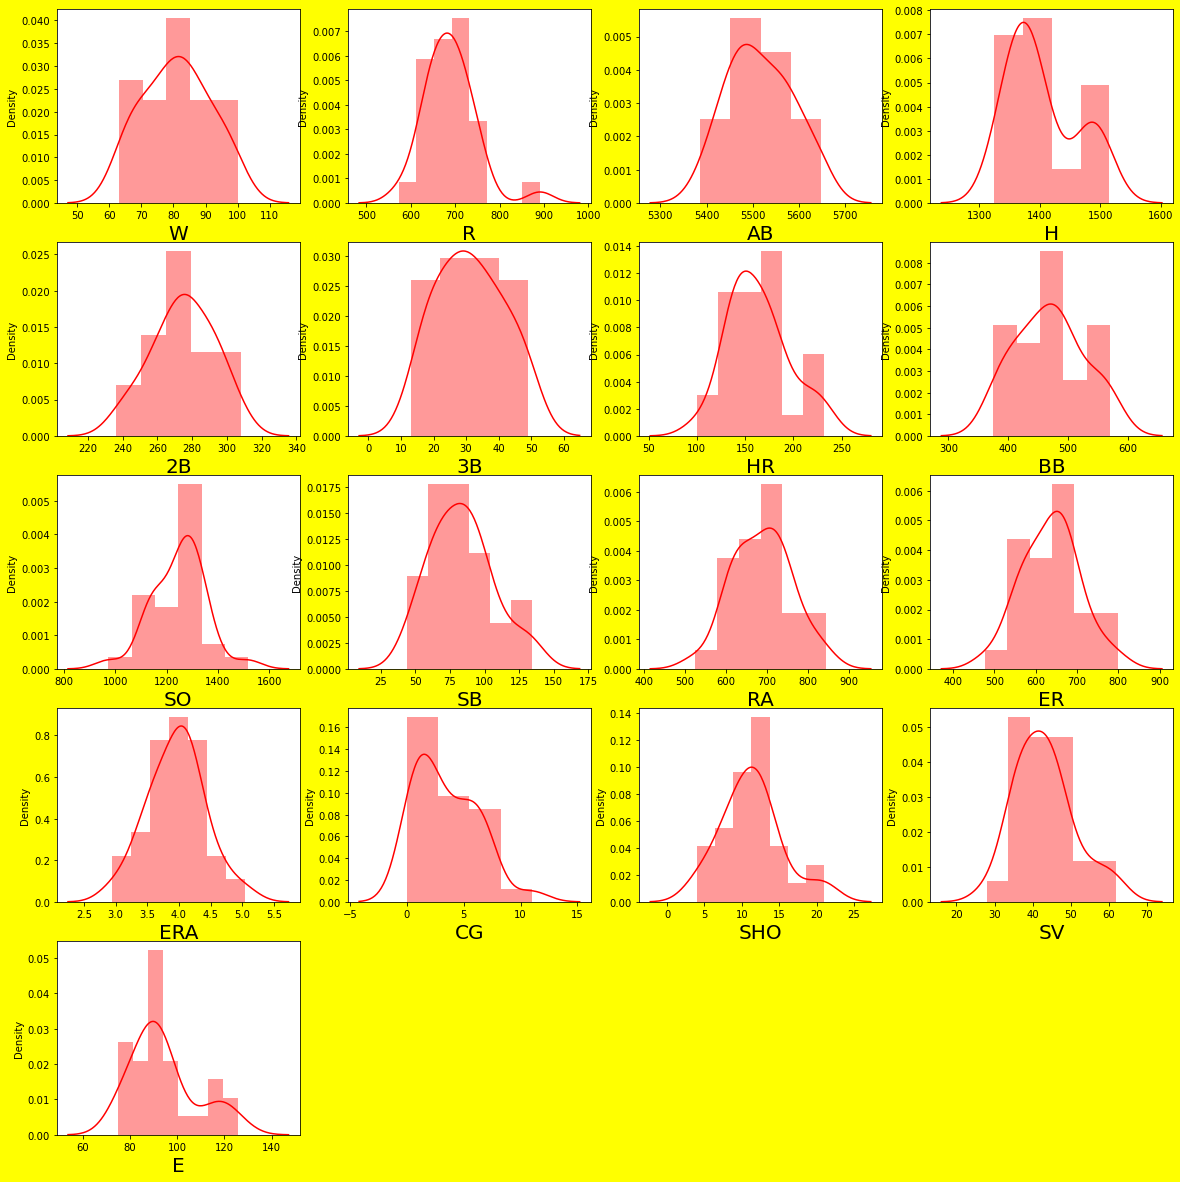

In [12]:
# Checking how the data has been distriubted in each column and skewness..
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(data[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:xlabel='W'>

Text(0.5, 0, 'W')

<AxesSubplot:xlabel='R'>

Text(0.5, 0, 'R')

<AxesSubplot:xlabel='AB'>

Text(0.5, 0, 'AB')

<AxesSubplot:xlabel='H'>

Text(0.5, 0, 'H')

<AxesSubplot:xlabel='2B'>

Text(0.5, 0, '2B')

<AxesSubplot:xlabel='3B'>

Text(0.5, 0, '3B')

<AxesSubplot:xlabel='HR'>

Text(0.5, 0, 'HR')

<AxesSubplot:xlabel='BB'>

Text(0.5, 0, 'BB')

<AxesSubplot:xlabel='SO'>

Text(0.5, 0, 'SO')

<AxesSubplot:xlabel='SB'>

Text(0.5, 0, 'SB')

<AxesSubplot:xlabel='RA'>

Text(0.5, 0, 'RA')

<AxesSubplot:xlabel='ER'>

Text(0.5, 0, 'ER')

<AxesSubplot:xlabel='ERA'>

Text(0.5, 0, 'ERA')

<AxesSubplot:xlabel='CG'>

Text(0.5, 0, 'CG')

<AxesSubplot:xlabel='SHO'>

Text(0.5, 0, 'SHO')

<AxesSubplot:xlabel='SV'>

Text(0.5, 0, 'SV')

<AxesSubplot:xlabel='E'>

Text(0.5, 0, 'E')

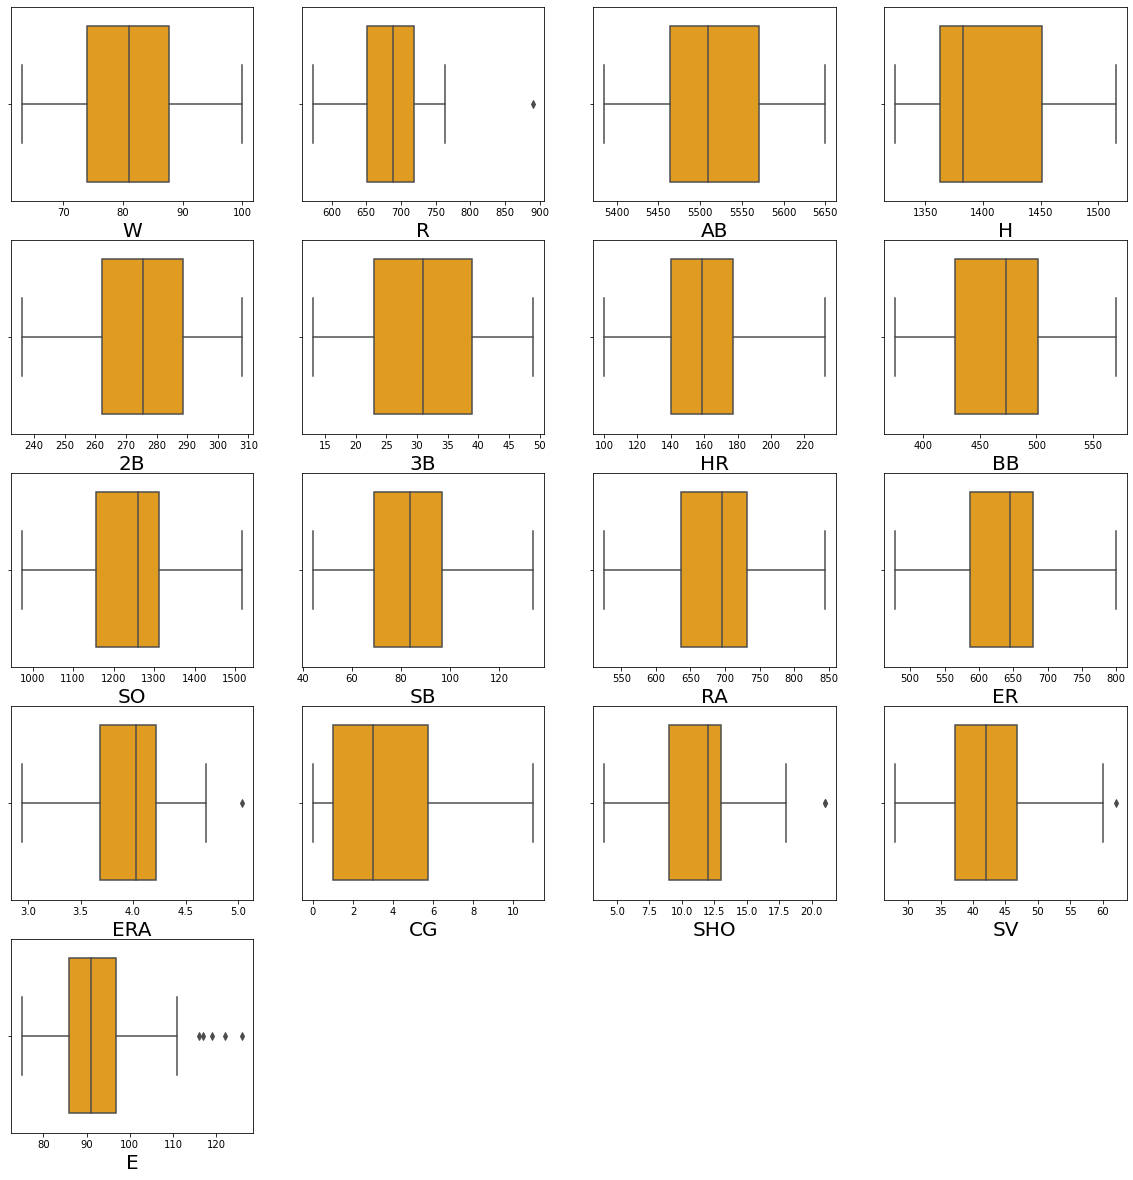

In [13]:
#Checking for outliers...
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(data[column],color='orange')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Bivariante Analysis..

<AxesSubplot:xlabel='W', ylabel='R'>

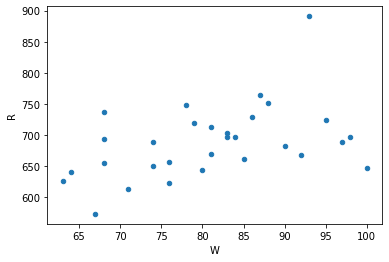

In [14]:
data.plot.scatter(x='W',y='R')

<AxesSubplot:xlabel='W', ylabel='R'>

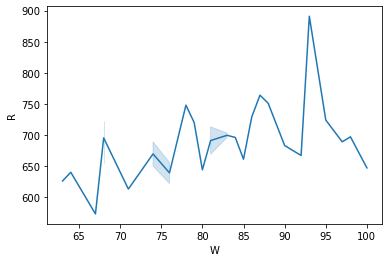

In [15]:
sns.lineplot(x='W',y='R',data=data)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Runs and Errors')

<AxesSubplot:title={'center':'Comparision between Runs and Errors'}, xlabel='R', ylabel='E'>

Text(0.5, 0, 'Runs')

Text(0, 0.5, 'Errors')

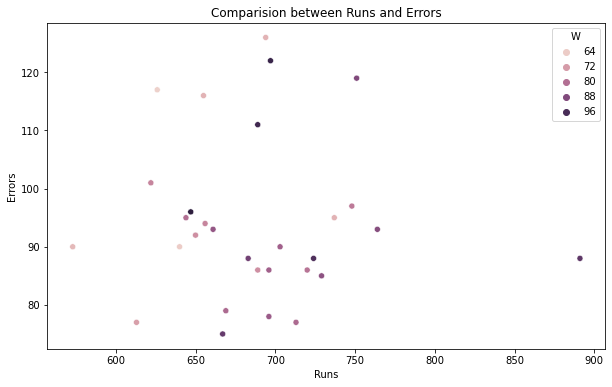

In [16]:
# Checking the relation between two variables
plt.figure(figsize=[10,6])
plt.title('Comparision between Runs and Errors')
sns.scatterplot(data['R'],data['E'],hue=data["W"]);
plt.xlabel("Runs")
plt.ylabel("Errors")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Runs and Hits')

<AxesSubplot:title={'center':'Comparision between Runs and Hits'}, xlabel='R', ylabel='H'>

Text(0.5, 0, 'Runs')

Text(0, 0.5, 'Hits')

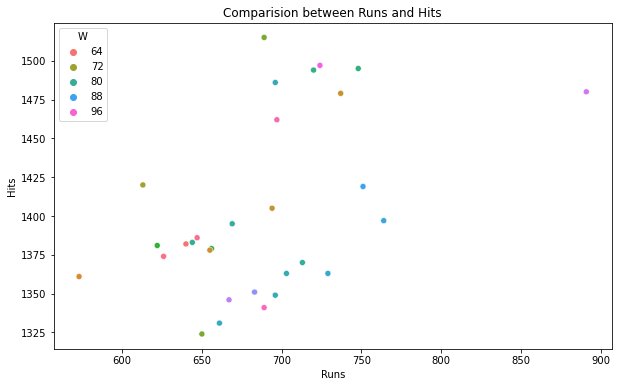

In [17]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Runs and Hits')
sns.scatterplot(data['R'],data['H'],hue=data["W"],palette="husl");
plt.xlabel("Runs")
plt.ylabel("Hits")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between AB and Hits')

<AxesSubplot:title={'center':'Comparision between AB and Hits'}, xlabel='AB', ylabel='H'>

Text(0.5, 0, 'At Bats')

Text(0, 0.5, 'Hits')

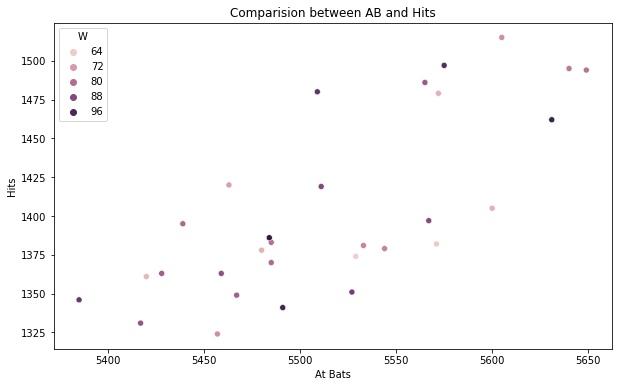

In [18]:
plt.figure(figsize=[10,6])
plt.title('Comparision between AB and Hits')
sns.scatterplot(data['AB'],data['H'],hue=data['W']);
plt.xlabel("At Bats")
plt.ylabel("Hits")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between  and Hits')

<AxesSubplot:title={'center':'Comparision between  and Hits'}, xlabel='RA', ylabel='ERA'>

Text(0.5, 0, 'Runs Allowed')

Text(0, 0.5, 'Earned Run Average')

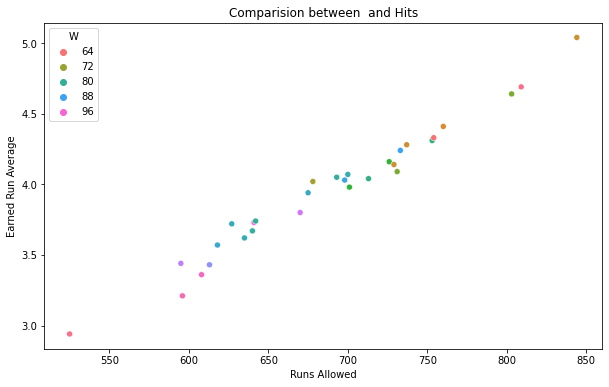

In [19]:
plt.figure(figsize=[10,6])
plt.title('Comparision between  and Hits')
sns.scatterplot(data['RA'],data['ERA'],hue=data['W'],palette="husl");
plt.xlabel("Runs Allowed")
plt.ylabel("Earned Run Average")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Runs and Wins ')

<AxesSubplot:title={'center':'Comparision between Runs and Wins '}, xlabel='R', ylabel='W'>

Text(0.5, 0, 'Runs')

Text(0, 0.5, 'Wins')

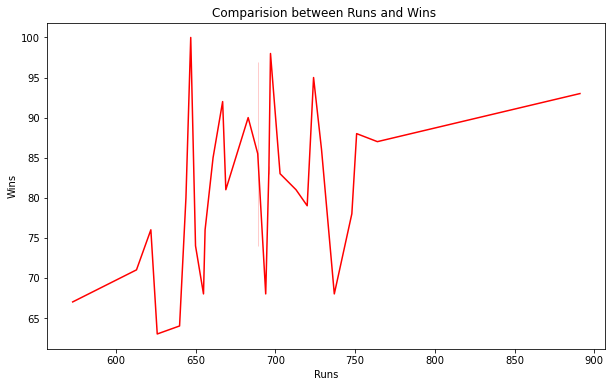

In [20]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Runs and Wins ')
sns.lineplot(data['R'],data['W'], color='r') 
plt.xlabel("Runs")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Walks and Wins ')

<AxesSubplot:title={'center':'Comparision between Walks and Wins '}, xlabel='BB', ylabel='W'>

Text(0.5, 0, 'Walks')

Text(0, 0.5, 'Wins')

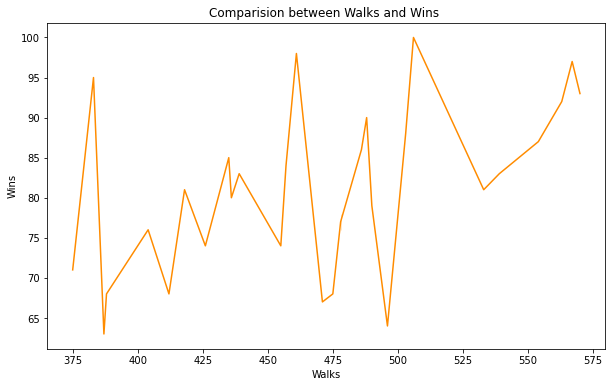

In [21]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Walks and Wins ')
sns.lineplot(data['BB'],data['W'], color='darkorange') 
plt.xlabel("Walks")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Doubles and Wins')

<AxesSubplot:title={'center':'Comparision between Doubles and Wins'}, xlabel='2B', ylabel='W'>

Text(0.5, 0, 'Doubles')

Text(0, 0.5, 'Wins')

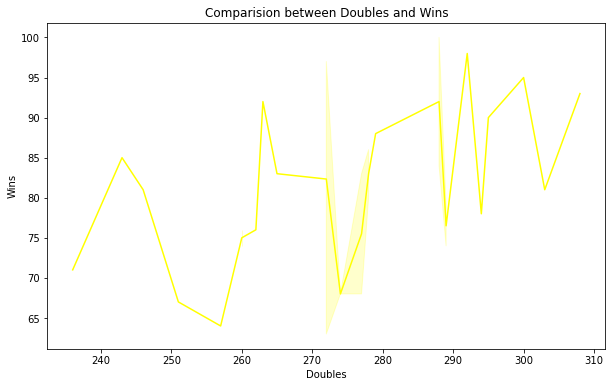

In [22]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Doubles and Wins')
sns.lineplot(data['2B'],data['W'],color="yellow");
plt.xlabel("Doubles")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Stolen Bases and Wins')

<AxesSubplot:title={'center':'Comparision between Stolen Bases and Wins'}, xlabel='SB', ylabel='W'>

Text(0.5, 0, 'Stolen Bases')

Text(0, 0.5, 'Wins')

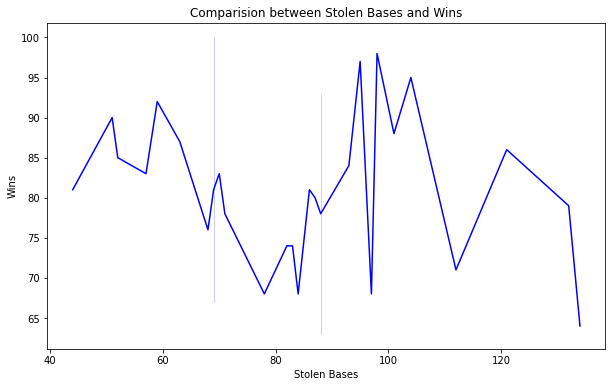

In [23]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Stolen Bases and Wins')
sns.lineplot(data['SB'],data['W'],color="blue");
plt.xlabel("Stolen Bases")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Runs Allowed and Wins')

<AxesSubplot:title={'center':'Comparision between Runs Allowed and Wins'}, xlabel='RA', ylabel='W'>

Text(0.5, 0, 'Runs Allowed')

Text(0, 0.5, 'Wins')

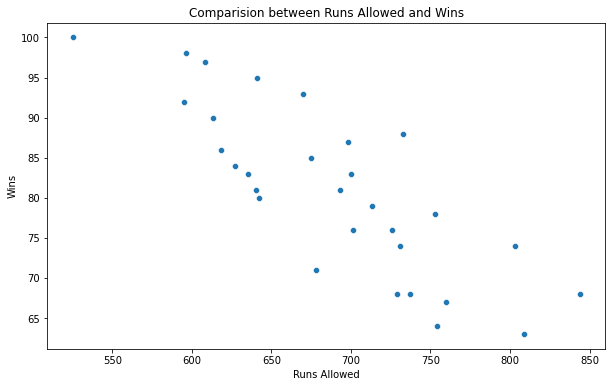

In [24]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Runs Allowed and Wins')
sns.scatterplot(data['RA'],data['W']);
plt.xlabel("Runs Allowed")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Earned Runs and Wins')

<AxesSubplot:title={'center':'Comparision between Earned Runs and Wins'}, xlabel='ER', ylabel='W'>

Text(0.5, 0, 'Earned Runs')

Text(0, 0.5, 'Wins')

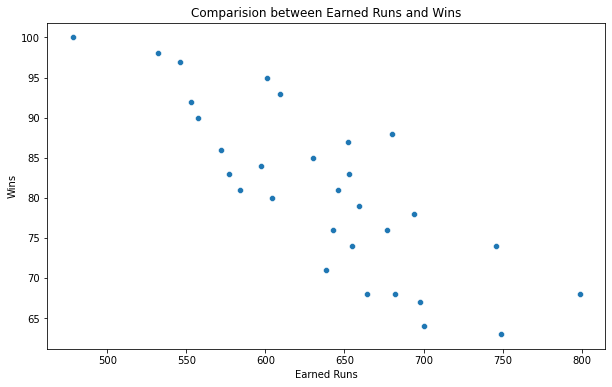

In [25]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Earned Runs and Wins')
sns.scatterplot(data['ER'],data['W']);
plt.xlabel("Earned Runs")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Earned Runs Average and Wins')

<AxesSubplot:title={'center':'Comparision between Earned Runs Average and Wins'}, xlabel='ERA', ylabel='W'>

Text(0.5, 0, 'Earned Runs Average')

Text(0, 0.5, 'Wins')

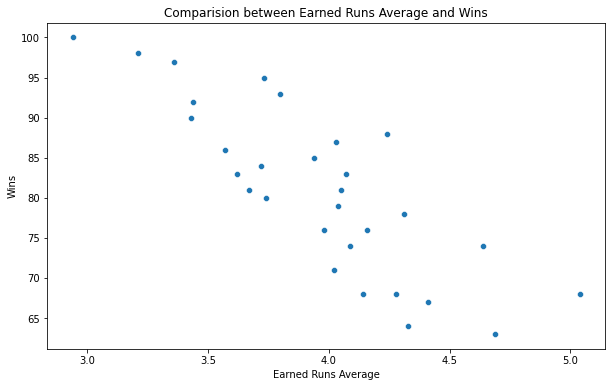

In [26]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Earned Runs Average and Wins')
sns.scatterplot(data['ERA'],data['W']);
plt.xlabel("Earned Runs Average")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Earned Runs and Earned Runs Average')

<AxesSubplot:title={'center':'Comparision between Earned Runs and Earned Runs Average'}, xlabel='ER', ylabel='ERA'>

Text(0.5, 0, 'Earned Runs')

Text(0, 0.5, 'Earned Runs Average')

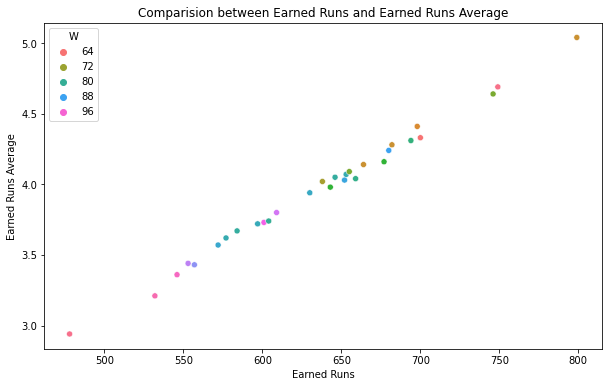

In [27]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Earned Runs and Earned Runs Average')
sns.scatterplot(data['ER'],data['ERA'],hue=data["W"],palette="husl");
plt.xlabel("Earned Runs")
plt.ylabel("Earned Runs Average")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Saves and Wins')

<AxesSubplot:title={'center':'Comparision between Saves and Wins'}, xlabel='SV', ylabel='W'>

Text(0.5, 0, 'Saves')

Text(0, 0.5, 'Wins')

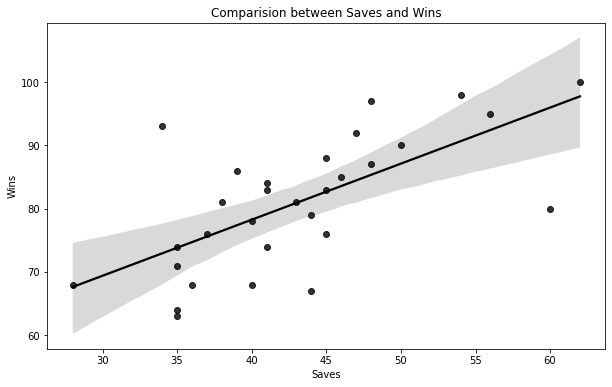

In [28]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Saves and Wins')
sns.regplot(data['SV'],data['W'],color="black");
plt.xlabel("Saves")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Saves and Wins')

<AxesSubplot:title={'center':'Comparision between Saves and Wins'}, xlabel='SV', ylabel='W'>

Text(0.5, 0, 'Saves')

Text(0, 0.5, 'Wins')

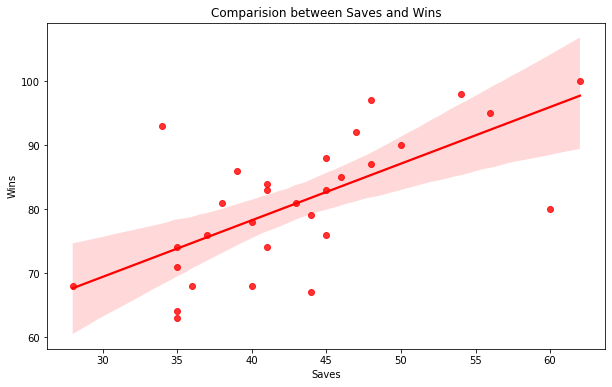

In [29]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Saves and Wins')
sns.regplot(data['SV'],data['W'],color="red");
plt.xlabel("Saves")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Complete Games and Wins')

<AxesSubplot:title={'center':'Comparision between Complete Games and Wins'}, xlabel='CG', ylabel='W'>

Text(0.5, 0, 'Complete Games')

Text(0, 0.5, 'Wins')

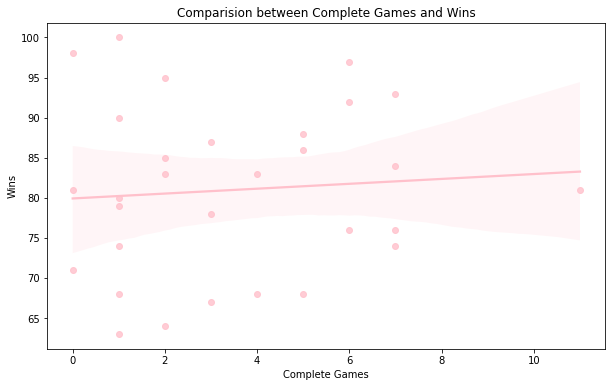

In [30]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Complete Games and Wins')
sns.regplot(data['CG'],data['W'],color="pink");
plt.xlabel("Complete Games")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Triples and Wins')

<AxesSubplot:title={'center':'Comparision between Triples and Wins'}, xlabel='3B', ylabel='W'>

Text(0.5, 0, 'Triples')

Text(0, 0.5, 'Wins')

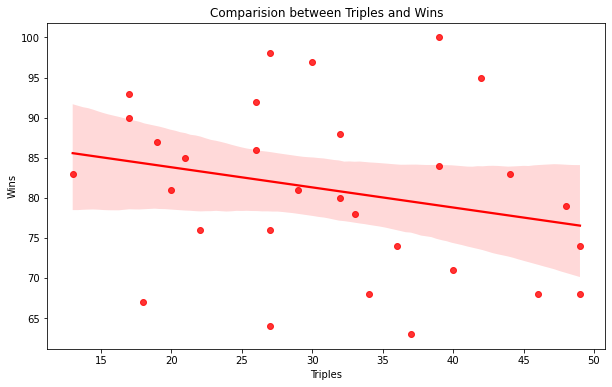

In [31]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Triples and Wins')
sns.regplot(data['3B'],data['W'],color="r");
plt.xlabel("Triples")
plt.ylabel("Wins")

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Comparision between Error and Wins')

<AxesSubplot:title={'center':'Comparision between Error and Wins'}, xlabel='E', ylabel='W'>

Text(0.5, 0, 'Error')

Text(0, 0.5, 'Wins')

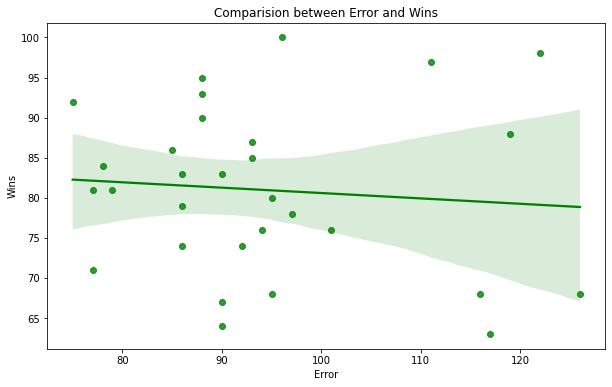

In [32]:
plt.figure(figsize=[10,6])
plt.title('Comparision between Error and Wins')
sns.regplot(data['E'],data['W'],color="g");
plt.xlabel("Error")
plt.ylabel("Wins")

# Removing Outliers..

In [33]:
from scipy.stats import zscore

In [34]:
df=data[["R","ERA","SHO","SV","E"]]

In [35]:
#To remove the outliers...
z=zscore(df)
z

,R,ERA,SHO,SV,E
0,0.619078,-0.506955,-0.814629,1.671607,-0.461470
1,0.134432,0.254598,0.172800,0.249879,-0.607197
2,-0.332906,-0.641347,-0.320914,-0.654856,-1.117242
3,-1.146419,0.053010,-0.567771,-0.784104,0.485758
4,0.013270,1.531318,0.172800,-1.042600,-0.607197
5,3.509647,-0.350165,-0.320914,-1.171848,-0.461470
6,1.311430,0.165003,-1.802057,0.637623,-0.097152
7,0.428681,0.209800,-0.320914,-0.008617,-1.262970
8,-0.765626,-0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,-0.320914,-0.396360,0.194303


In [36]:
#Creating a data frame after removing the outliers....
data1 = data[(z<3).all(axis=1)]

In [37]:
data1.shape
#This is the shape of new dataframe...

(29, 17)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

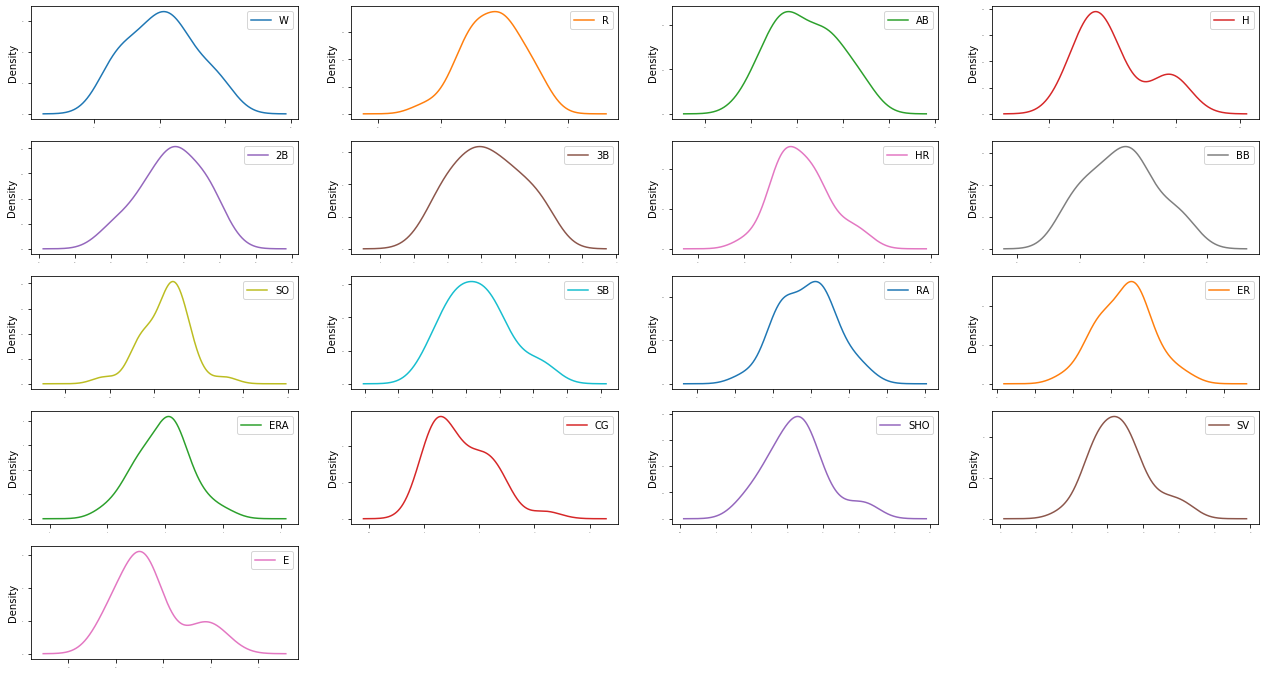

In [38]:
data1.plot(kind='density', subplots=True, layout=(5,4), sharex=False, legend=True, fontsize=1, figsize=(22,12))
plt.show()

In [39]:
# Checking the skewness
data1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [40]:
sk_features= ["CG", "SHO", "SV", "E"]

In [41]:
# Using yeo-johnson method to remove the skewness

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [42]:
data1[sk_features] = scaler.fit_transform(data1[sk_features].values)
data1[sk_features].head()

,CG,SHO,SV,E
0,-0.307098,-0.787002,1.532753,-0.348265
1,-0.307098,0.236737,0.312020,-0.540820
2,2.011315,-0.252844,-0.664137,-1.326125
3,1.264463,-0.513555,-0.820689,0.650818
4,1.264463,0.236737,-1.149165,-0.540820


In [43]:
data1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

<Figure size 1296x1800 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Heatmap to check corelation')

<function matplotlib.pyplot.show(close=None, block=None)>

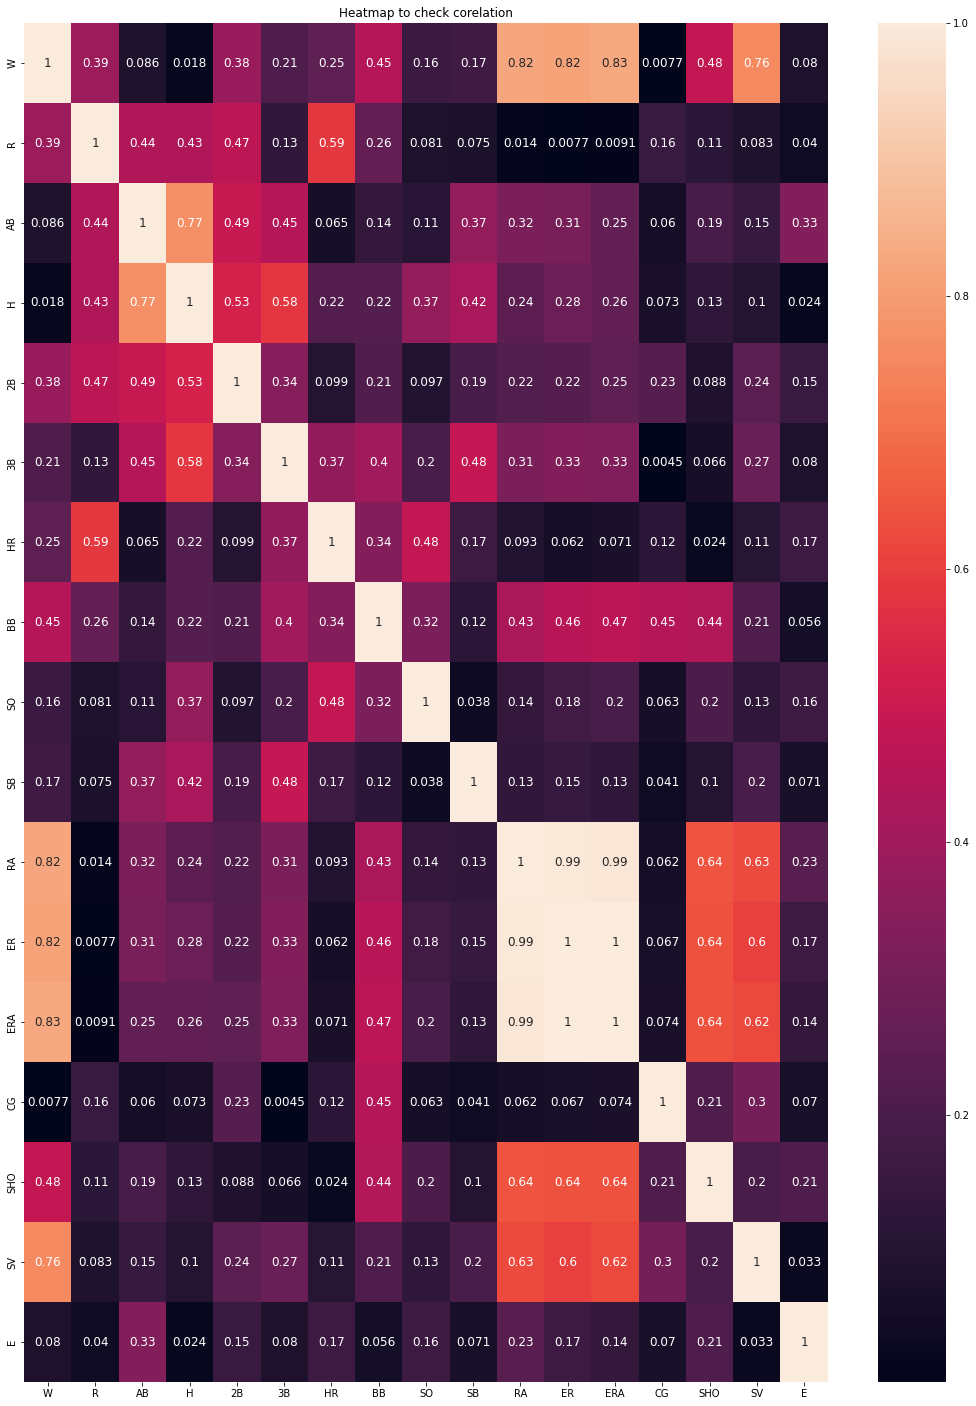

In [44]:
corr=data1.corr().abs()
plt.figure(figsize=(18,25))
sns.heatmap(corr,annot=True,annot_kws={'size':12})
plt.title("Heatmap to check corelation")
plt.show

<Figure size 1584x504 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'target')

Text(0.5, 1.0, 'correlation between lanel and feature using bar plot')

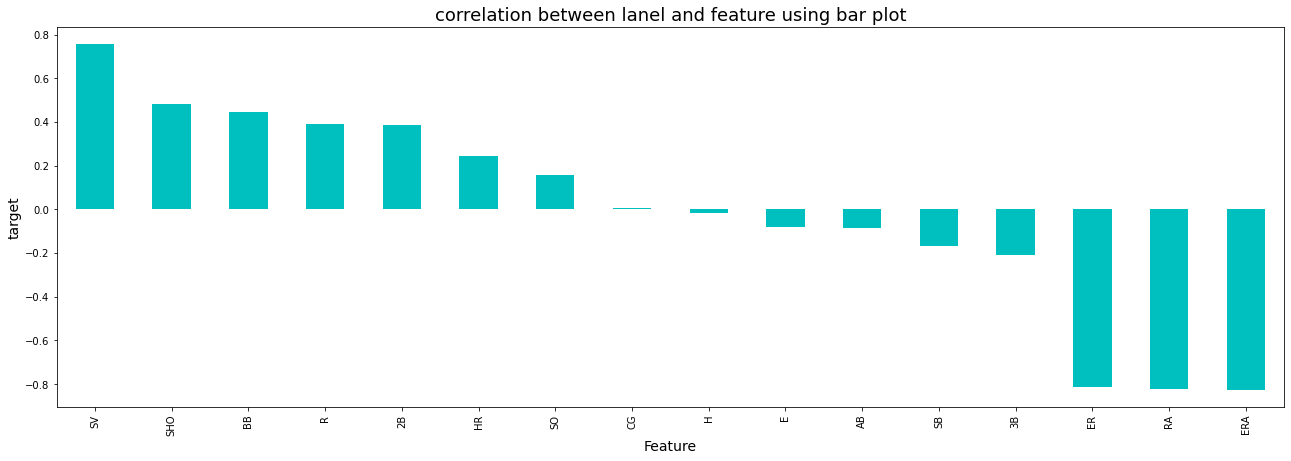

In [45]:
plt.figure(figsize=(22,7))
data1.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [46]:
data1.drop("H", axis=1, inplace=True)

In [47]:
data1.drop("CG", axis=1, inplace=True)

# Data Preprocessing..

In [48]:
X = data1.drop("W", axis=1)
Y = data1["W"]

In [49]:
X.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,724,5575,300,42,139,383,973,104,641,601,3.73,-0.787002,1.532753,-0.348265
1,696,5467,277,44,156,439,1264,70,700,653,4.07,0.236737,0.312020,-0.540820
2,669,5439,303,29,141,533,1157,86,640,584,3.67,-0.252844,-0.664137,-1.326125
3,622,5533,260,27,136,404,1231,68,701,643,3.98,-0.513555,-0.820689,0.650818
4,689,5605,289,49,151,455,1259,83,803,746,4.64,0.236737,-1.149165,-0.540820


# Standard Scaler

In [50]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


In [51]:
x=X_scaled

# VIF

In [52]:
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]

In [53]:
vif

,vif
0,6.219825
1,9.828077
2,2.683572
3,3.196853
4,7.369072
5,2.686472
6,2.741072
7,1.757901
8,179.096825
9,1754.643859


# Model Building

#                                                  LINEAR REGRESSION

# Train and Test

In [67]:
#Finding r2 score using train and test..
max_Acc = 0
max_RS = 0
for i in range(1,200):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30, random_state=i)
    log_reg = LinearRegression()
    log_reg.fit(x_train, Y_train)
    pred = log_reg.predict(x_test)
    acc=r2_score(Y_test, pred)
    if acc>max_Acc:
        max_Acc=acc
        max_RS=i
print("Maximum r2 score is ",max_Acc," on Random_state ",max_RS)

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

Maximum r2 score is  0.909754010538293  on Random_state  104


In [69]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=.30,random_state=maxRS)
#Making a new train and test..

In [70]:
# Checking r2score for Linear Regression
Lin_Reg = LinearRegression()
Lin_Reg.fit(x_train,Y_train)

LinearRegression()

In [71]:
# prediction
predLin_Reg=Lin_Reg.predict(x_test)
print('R2_score:',r2_score(Y_test,predLin_Reg))

R2_score: 0.909754010538293


In [72]:
# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(Y_test, predLin_Reg))

MAE: 2.8597181915389407


In [73]:
# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(Y_test, predLin_Reg))

MSE: 11.932525273270151


In [74]:
# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predLin_Reg)))

RMSE: 3.454348748066725


In [108]:
# Checking cv score for Linear Regression
print(cross_val_score(Lin_Reg,x,Y,cv=5).mean())

0.15921112291547615


# Lasso Regressor

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [77]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})

{'alpha': 1, 'random_state': 0}


In [78]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,Y_train)
lasso.score(x_train,Y_train)
pred_lasso=lasso.predict(x_test)

print('R2_Score:',r2_score(Y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(Y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))

Lasso(alpha=1, random_state=0)

0.8486086077820971

R2_Score: 0.8328047650206479
MAE: 4.216381358502037
MSE: 22.106925513936556
RMSE: 4.701800241815528


In [110]:
# Checking cv score for Lasso Regression
print(cross_val_score(lasso,x,Y,cv=5).mean())

0.5072274071281615


# Ridge Regressor

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [81]:
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.26], 'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,Y_train)
print(clf.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']})

{'alpha': 10.26, 'solver': 'saga'}


In [82]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,Y_train)
ridge.score(x_train,Y_train)
pred_ridge=ridge.predict(x_test)

print('R2_Score:',r2_score(Y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(Y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))

Ridge(alpha=10.26, solver='sag')

0.856954201340483

R2_Score: 0.7950834206112629
MAE: 4.267846426051714
MSE: 27.094525496955246
RMSE: 5.205240195894445


In [109]:
# Checking cv score for Ridge Regression
print(cross_val_score(ridge,x,Y,cv=5).mean())

0.3773486800415667


In [104]:
from sklearn.linear_model import SGDRegressor

In [106]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,Y_train)

SGDRegressor()

In [107]:
# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(Y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(Y_test, predSGD))
print('MSE:',metrics.mean_squared_error(Y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, predSGD)))

R2_Score: 0.942093202842198
MAE: 1.916117546023459
MSE: 7.656565401976049
RMSE: 2.767049945695966


In [111]:
# Checking cv score for SGD Regression
print(cross_val_score(SGD,x,Y,cv=5).mean())

0.23889130830220306


# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
# Lasso Regressor
parameters = {'alpha':[0.01, 0.1, 1.0,10.26],
              'selection':['cyclic','random'],
              'max_iter':[2,4,6,8,10],
              'tol':[100,1000],
              'fit_intercept':['bool']}

In [114]:
GCV=GridSearchCV(Lasso(),parameters,cv=5)
GCV.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.26],
                         'fit_intercept': ['bool'],
                         'max_iter': [2, 4, 6, 8, 10],
                         'selection': ['cyclic', 'random'],
                         'tol': [100, 1000]})

In [115]:
GCV.best_params_

{'alpha': 0.01,
 'fit_intercept': 'bool',
 'max_iter': 6,
 'selection': 'random',
 'tol': 100}

In [116]:
BaseBall = Lasso(alpha=1.0, fit_intercept="bool", max_iter=2, selection="random", tol=100)
BaseBall.fit(x_train, Y_train)
pred = BaseBall.predict(x_test)
print('R2_Score:',r2_score(Y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))

Lasso(fit_intercept='bool', max_iter=2, selection='random', tol=100)

R2_Score: 83.28047650206479
RMSE value: 4.701800241815528


In [119]:
import joblib
joblib.dump(BaseBall,"BaseBall_Study.pkl")

['BaseBall_Study.pkl']

#                                                   THANK YOU